# chap9

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
data = np.arange(10)

In [4]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

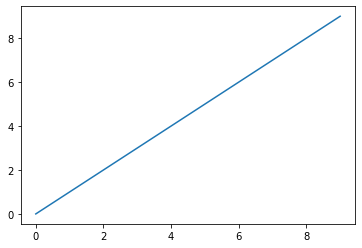

In [5]:
plt.plot(data)

In [6]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [7]:
ax1 = fig.add_subplot(2, 2, 1)

In [8]:
ax2 = fig.add_subplot(2, 2, 2)

In [9]:
ax3 = fig.add_subplot(2, 2, 3)

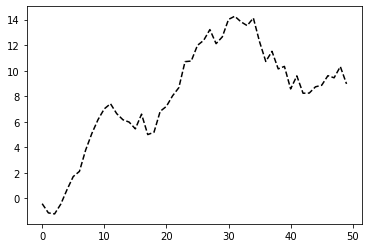

In [10]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [11]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [12]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [13]:
plt.close('all')

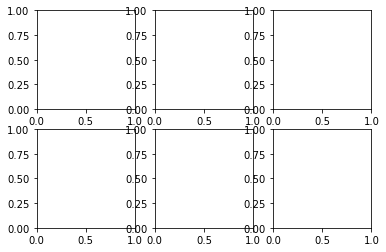

In [14]:
fig, axes = plt.subplots(2, 3)

In [15]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

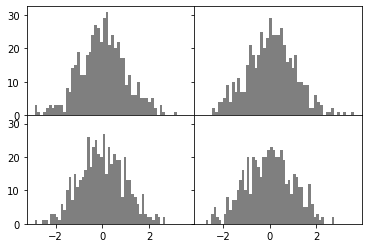

In [16]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [17]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [51]:
from numpy.random import randn

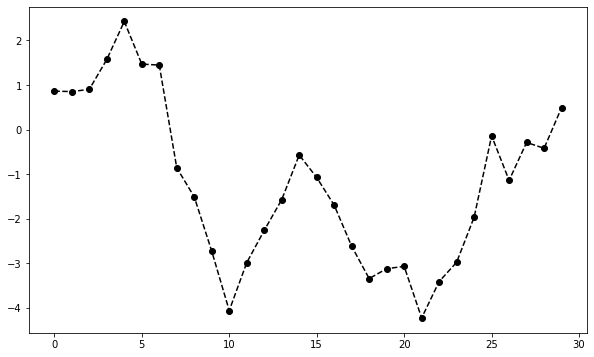

In [52]:
plt.plot(randn(30).cumsum(), 'ko--')

In [53]:
plt.close('all')

In [54]:
data = np.random.randn(30).cumsum()

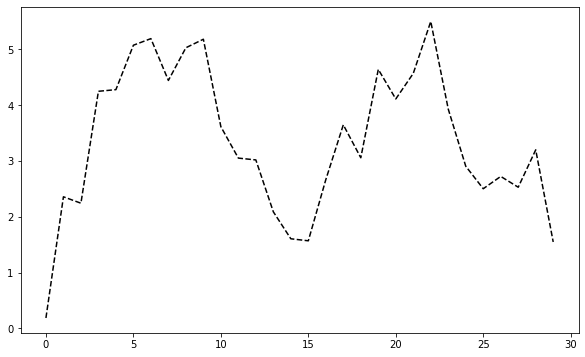

In [55]:
plt.plot(data, 'k--', label='Default')

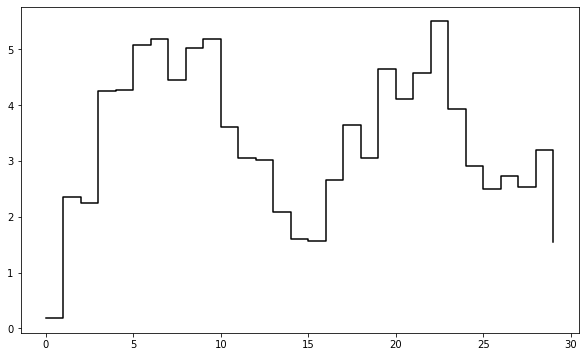

In [56]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [57]:
fig = plt.figure()

<Figure size 720x432 with 0 Axes>

In [30]:
ax = fig.add_subplot(1, 1, 1)

In [31]:
ax.plot(np.random.randn(1000).cumsum())

In [32]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [33]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [34]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [35]:
ax.set_xlabel('Stages')

Text(0.5, 0, 'Stages')

# chap10

In [58]:
import numpy as np
import pandas as pd

## GroupBy 메카닉

In [60]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})

In [61]:
df

,key1,key2,data1,data2
0,a,one,-1.224145,0.555154
1,a,two,-1.800840,1.306720
2,b,one,1.634736,-0.440554
3,b,two,0.989008,-0.301350
4,a,one,0.457940,0.498791


In [62]:
grouped = df['data1'].groupby(df['key1'])

In [63]:
grouped

In [64]:
grouped.mean()

key1
a   -0.855682
b    1.311872
Name: data1, dtype: float64

In [65]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [66]:
means

key1  key2
a     one    -0.383103
      two    -1.800840
b     one     1.634736
      two     0.989008
Name: data1, dtype: float64

In [67]:
means.unstack()

key2,one,two
key1,,
a,-0.383103,-1.800840
b,1.634736,0.989008


In [68]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])

In [69]:
df['data1'].groupby([states, years]).mean()

California  2005   -1.800840
            2006    1.634736
Ohio        2005   -0.117568
            2006    0.457940
Name: data1, dtype: float64

In [70]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.855682,0.786889
b,1.311872,-0.370952


In [71]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.383103  0.526973
     two  -1.800840  1.306720
b    one   1.634736 -0.440554
     two   0.989008 -0.301350

In [72]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [73]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -1.224145  0.555154
1    a  two -1.800840  1.306720
4    a  one  0.457940  0.498791
b
  key1 key2     data1     data2
2    b  one  1.634736 -0.440554
3    b  two  0.989008 -0.301350


In [74]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -1.224145  0.555154
4    a  one  0.457940  0.498791
('a', 'two')
  key1 key2    data1    data2
1    a  two -1.80084  1.30672
('b', 'one')
  key1 key2     data1     data2
2    b  one  1.634736 -0.440554
('b', 'two')
  key1 key2     data1    data2
3    b  two  0.989008 -0.30135


In [75]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,key1,key2,data1,data2
2,b,one,1.634736,-0.440554
3,b,two,0.989008,-0.301350


In [76]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [77]:
grouped = df.groupby(df.dtypes, axis=1)

In [78]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0 -1.224145  0.555154
1 -1.800840  1.306720
2  1.634736 -0.440554
3  0.989008 -0.301350
4  0.457940  0.498791
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


## 컬럼이나 컬럼의 일부만 선택하기

In [79]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.526973
     two   1.306720
b    one  -0.440554
     two  -0.301350

In [80]:
s_grouped = df.groupby(['key1', 'key2'])['data2']

In [81]:
s_grouped

In [82]:
s_grouped.mean()

key1  key2
a     one     0.526973
      two     1.306720
b     one    -0.440554
      two    -0.301350
Name: data2, dtype: float64

## Dicts와 Series를 사용한 그룹화

In [83]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

In [84]:
people.iloc[2:3, [1, 2]] = np.nan

In [85]:
people

,a,b,c,d,e
Joe,-0.823991,1.320566,0.507965,-0.653438,0.186980
Steve,-0.391725,-0.272293,-0.017141,0.680321,0.635512
Wes,-0.757177,NaN,NaN,-1.677790,0.426986
Jim,-1.563740,-0.367488,1.045913,1.219954,-0.247699
Travis,-0.416232,-0.116747,-1.844788,2.068708,-0.776967


In [86]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [87]:
by_column = people.groupby(mapping, axis=1)

In [88]:
by_column.sum()

,blue,red
Joe,-0.145473,0.683554
Steve,0.663179,-0.028506
Wes,-1.677790,-0.330190
Jim,2.265867,-2.178926
Travis,0.223920,-1.309947


In [89]:
map_series = pd.Series(mapping)

In [90]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [91]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


## 함수를 사용한 그룹화

In [92]:
people.groupby(len).sum()

,a,b,c,d,e
3,-3.144907,0.953078,1.553877,-1.111274,0.366266
5,-0.391725,-0.272293,-0.017141,0.680321,0.635512
6,-0.416232,-0.116747,-1.844788,2.068708,-0.776967


In [93]:
key_list = ['one', 'one', 'one', 'two', 'two']

In [94]:
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -0.823991  1.320566  0.507965 -1.677790  0.186980
  two -1.563740 -0.367488  1.045913  1.219954 -0.247699
5 one -0.391725 -0.272293 -0.017141  0.680321  0.635512
6 two -0.416232 -0.116747 -1.844788  2.068708 -0.776967

## 인덱스 수준별 그룹화

In [95]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])

In [96]:
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)

In [97]:
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      1.440167 -0.110557  1.227387  1.920784  0.746433
1      2.224660 -0.679400  0.727369 -0.868731 -1.213851
2     -0.470631 -0.919242 -0.838827  0.435155 -0.557805
3     -0.567455 -0.372642 -0.926557  1.755108  1.209810

In [98]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3
